# 220968280 - Anirudh Swaminathan - DSE A2

## Week 3 - Exercise 7 - household power consumption dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [17]:
df = pd.DataFrame()
df = pd.read_table("C://Users//s_ani//Documents//textbooks//4thSem//ML_LAB//Week3//datasets//household_power_consumption.txt", delimiter='\t')
df = df.drop(['Date','Time'], axis=1)
df = df.dropna(axis=0)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0,1,17.0
1,5.36,0.436,233.63,23,0,1,16.0
2,5.374,0.498,233.29,23,0,2,17.0
3,5.388,0.502,233.74,23,0,1,17.0
4,3.666,0.528,235.68,15.8,0,1,17.0


In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

### 1. Linear regression on household power consumption dataset

In [27]:
X = train['Global_active_power']
Y = train['Global_reactive_power']

In [28]:
train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
522403,3.8,0.21,237.55,16,0,38,18.0
446806,1.29,0,240.83,5.2,0,0,18.0
939326,0.236,0,240.05,1,0,0,1.0
531097,1.694,0.086,239.86,7,1,0,18.0
374848,0.28,0.176,243.4,1.4,0,1,0.0
...,...,...,...,...,...,...,...
262950,0.194,0.092,238.64,0.8,0,0,0.0
369766,0.22,0.13,240.26,1,0,0,0.0
131940,1.482,0.152,243.62,6.8,3,0,0.0
675095,1.814,0.052,238.16,7.6,0,0,17.0


In [15]:
X = np.array(X).reshape((-1,1))
Y = np.array(Y).reshape((-1,1))
reg = LinearRegression().fit(X, Y)

In [22]:
print(f'{reg.intercept_} + {reg.coef_} * x')

[0.09094586] + [[0.02471364]] * x


In [23]:
x = np.linspace(15, 40, 100)
y = reg.intercept_ + reg.coef_*x
y = y.reshape(100,1)

In [29]:
X = np.array(X).reshape((-1,1))
Y = np.array(Y).reshape((-1,1))
reg = LinearRegression().fit(X, Y)

In [30]:
print(f'{reg.intercept_} + {reg.coef_} * x')

[0.09094586] + [[0.02471364]] * x


In [31]:
x = np.linspace(15, 40, 100)
y = reg.intercept_ + reg.coef_*x
y = y.reshape(100,1)

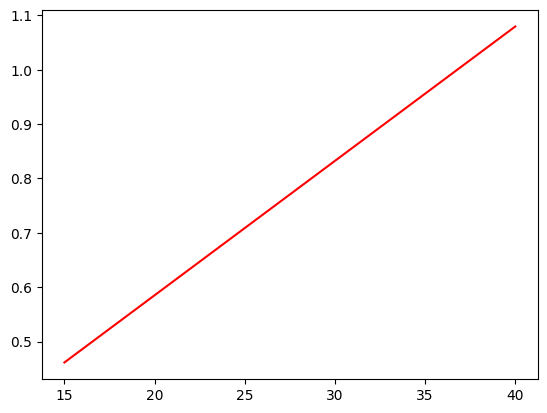

In [32]:
plt.plot(x, y, c='red')

In [33]:
xi = int(input("Enter an integer: "))
y_pred = reg.predict([[xi]])
print(f'the predicted value is:{y_pred}')

the predicted value is:[[0.75821411]]


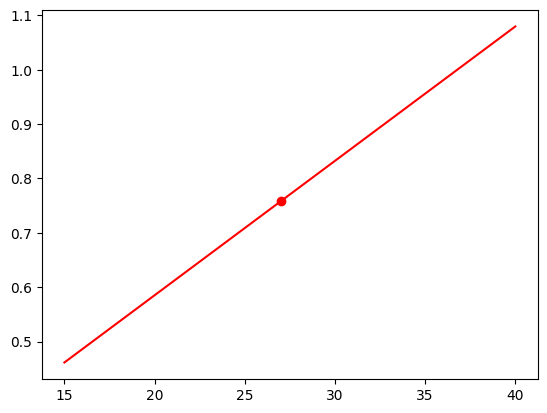

In [36]:
plt.scatter(xi,y_pred,c='red')
plt.plot(x, y, c='red')

In [38]:
predictions = reg.predict(np.array(test['Global_active_power']).reshape((-1,1)))
mse = mean_squared_error(test['Global_reactive_power'], predictions)
print(f'mse = {mse}')

mse = 0.011208696627481897


### 2. Multiple linear regression on household power consumption dataset

In [42]:
X = train.drop('Global_reactive_power', axis=1)
Y = train['Global_reactive_power']
Y = pd.DataFrame(Y)

In [46]:
reg = LinearRegression().fit(X, Y)

In [47]:
print(f'{reg.intercept_[0]} + {reg.coef_[0][0]}*X1 + {reg.coef_[0][1]}*X2')

-0.730253159926028 + -0.8980589063571228*X1 + 0.003350371857778811*X2


In [48]:
X

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
522403,3.8,237.55,16,0,38,18.0
446806,1.29,240.83,5.2,0,0,18.0
939326,0.236,240.05,1,0,0,1.0
531097,1.694,239.86,7,1,0,18.0
374848,0.28,243.4,1.4,0,1,0.0
...,...,...,...,...,...,...
262950,0.194,238.64,0.8,0,0,0.0
369766,0.22,240.26,1,0,0,0.0
131940,1.482,243.62,6.8,3,0,0.0
675095,1.814,238.16,7.6,0,0,17.0


In [49]:
x1i = float(input('enter x1:'))
x2i = float(input('enter x2:'))
x3i = float(input('enter x3:'))
x4i = float(input('enter x4:'))
x5i = float(input('enter x5:'))
x6i = float(input('enter x6:'))
x = np.array([[x1i, x2i, x3i, x4i, x5i, x6i]])
y_pred = reg.predict(x)
print(f'predicted value:{y_pred}')

predicted value:[[-0.20901538]]


c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
test_x = test.drop('Global_reactive_power', axis=1)
test_x = pd.DataFrame(test_x)
predictions = reg.predict((test_x))
mse = mean_squared_error(test['Global_reactive_power'], predictions)
print(f'mse = {mse}')

mse = 0.009273753787898279
